In [1]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('societies.csv', 'societies'),
     # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='vaibhs@15',
    database='society'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/Vaibhavi/societies'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

C:\Users\Vaibhavi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Processing societies.csv
NaN values before replacement:
Address                  0
Area of Operation        0
Date of Registration     1
District                10
Name of Society          0
Sector Type              1
State                    0
Sr. No.                  0
Year                     1
dtype: int64



In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='vaibhs@15',
    database='society'
)

curr=db.cursor()

In [5]:
query="""select count(DISTINCT District) from societies"""

curr.execute(query)

data=curr.fetchall()

data[0][0]

55

In [6]:
query="""select count(DISTINCT Area_of_Operation) from societies"""

curr.execute(query)

data=curr.fetchall()

data[0][0]

20

In [7]:
query="""select count(DISTINCT Sector_Type) from societies"""

curr.execute(query)

data=curr.fetchall()

data[0][0]

13

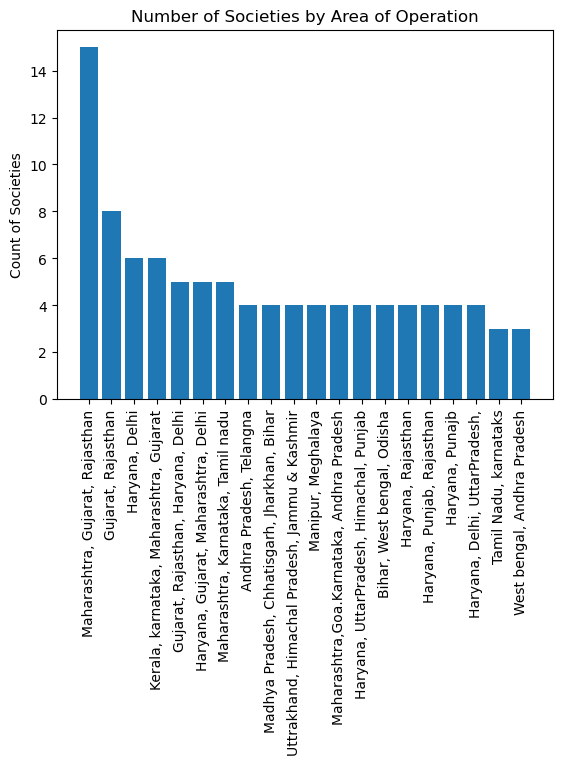

In [8]:
query="""select count(DISTINCT Name_of_society),Area_of_operation from societies group by Area_of_operation"""

curr.execute(query)

data=curr.fetchall()

df=pd.DataFrame(data, columns=["Count_Societies","Area_of_operation"])
df=df.sort_values(by="Count_Societies", ascending=False)
plt.bar(df["Area_of_operation"],df["Count_Societies"])
plt.xticks(rotation=90)
plt.ylabel("Count of Societies")
plt.title("Number of Societies by Area of Operation")

plt.show()



# #horizontal bar
# plt.bar(df["Count_Societies"],df["Area_of_operation"])
# plt.ylabel("Area_of_operation_trunc")
# plt.title("Number of Societies by Area of Operation (Truncated)")

# plt.show()

# #histogram
# plt.hist(df["Count_Societies"], bins=20)  # Adjust the number of bins as needed
# plt.xlabel("Area of Operation")
# plt.ylabel("Count of Societies")
# plt.title("Distribution of Societies by Area of Operation")
# plt.show()

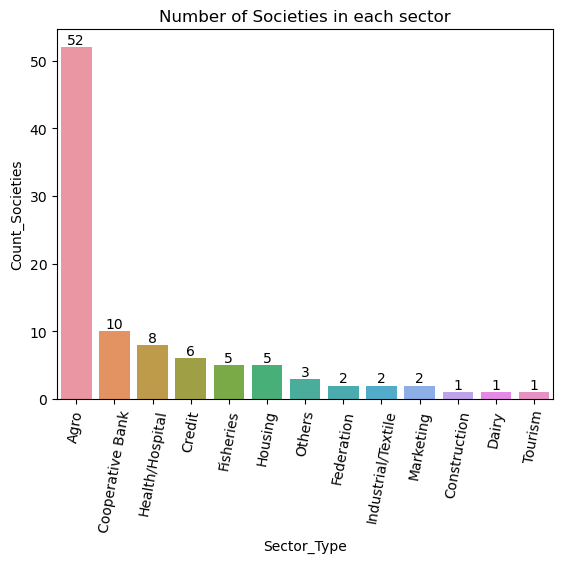

In [9]:
query="""select count(DISTINCT Name_of_society),Sector_Type from societies group by Sector_Type """

curr.execute(query)

data=curr.fetchall()

df=pd.DataFrame(data, columns=["Count_Societies","Sector_Type"])
df=df.sort_values(by="Count_Societies", ascending=False)
ax=sns.barplot(x=df["Sector_Type"],y=df["Count_Societies"],data=df)
plt.xticks(rotation=80)
ax.bar_label(ax.containers[0])
plt.title("Number of Societies in each sector")

plt.show()

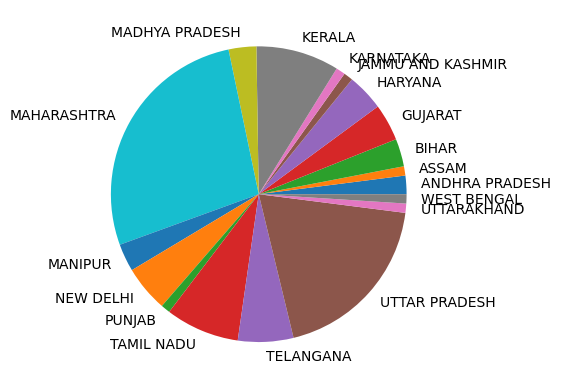

In [10]:
query="""select count(DISTINCT Name_of_society),State from societies group by State """

curr.execute(query)

data=curr.fetchall()

df=pd.DataFrame(data, columns=["Count_Societies","State"])
# df=df.sort_values(by="Count_Societies", ascending=False)
plt.pie(df["Count_Societies"],labels=df["State"])

plt.show()

In [11]:
# import pandas as pd
# import geopandas as gpd

# # Assuming your cursor object is named 'curr' and the query has been executed
# query = """select count(DISTINCT Name_of_society) AS Count_Societies,State from societies group by State """
# curr.execute(query)
# data = curr.fetchall()

# df = pd.DataFrame(data, columns=["Count_Societies", "State"])

# # **Verify file path or use absolute path if needed**
# states_gdf = gpd.read_file('D:/Google Chrome/India-State-and-Country-Shapefile-Updated-Jan-2020-master/India-State-and-Country-Shapefile-Updated-Jan-2020-master')



# if'Count_Societies' in states_gdf.columns:
#     columns = ['Count_Societies']
#     # Create a choropleth map with customization options
#     states_gdf.plot(column=columns[0], cmap='YlGnBu', legend=True)  # Adjust colormap

# plt.show()

C:\Users\Vaibhavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaibhavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


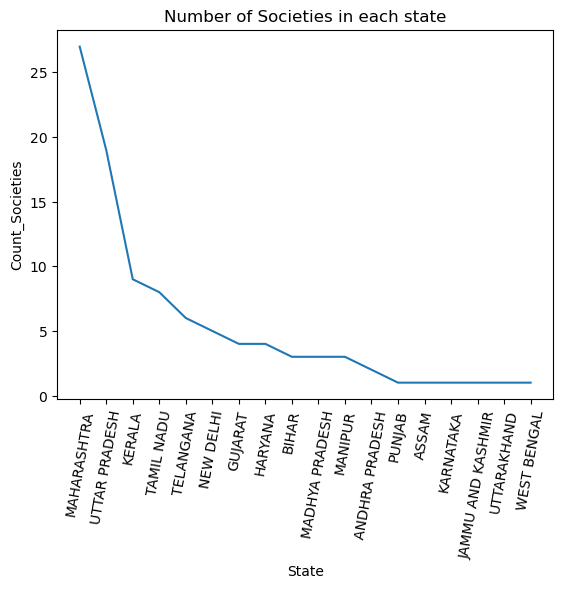

In [23]:
query = """select count(DISTINCT Name_of_society) AS Count_Societies,State from societies group by State """
curr.execute(query)
data = curr.fetchall()

df = pd.DataFrame(data, columns=["Count_Societies", "State"])


df=pd.DataFrame(data, columns=["Count_Societies","State"])
df=df.sort_values(by="Count_Societies", ascending=False)
ax=sns.lineplot(x=df["State"],y=df["Count_Societies"],data=df)
plt.xticks(rotation=80)
# ax.bar_label(ax.containers[0])
plt.title("Number of Societies in each state")


plt.show()

In [13]:
query = """SELECT DISTINCT year
FROM societies;"""
curr.execute(query)
data = curr.fetchall()
data

[(None,),
 (2022.0,),
 (2021.0,),
 (2017.0,),
 (2020.0,),
 (2019.0,),
 (2018.0,),
 (2016.0,)]

In [14]:
# Fetch all results from the previous query
results = curr.fetchall()

# Now you can execute your new query
query = """SELECT COUNT(Name_of_Society) FROM societies WHERE year = 2022"""
curr.execute(query)
data = curr.fetchall()
"total societies in 2022 are", data[0][0]


('total societies in 2022 are', 141)

In [15]:
query = """SELECT COUNT(Name_of_Society) FROM societies WHERE year = 2021"""
curr.execute(query)
data = curr.fetchall()
"total societies in 2021 are", data[0][0]

('total societies in 2021 are', 42)

In [16]:
query = """SELECT COUNT(Name_of_Society) FROM societies WHERE year = 2020"""
curr.execute(query)
data = curr.fetchall()
"total societies in 2020 are", data[0][0]

('total societies in 2020 are', 30)

In [17]:
query = """SELECT COUNT(Name_of_Society) FROM societies WHERE year = 2019"""
curr.execute(query)
data = curr.fetchall()
"total societies in 2019 are", data[0][0]

('total societies in 2019 are', 27)

In [18]:
query = """SELECT COUNT(Name_of_Society) FROM societies WHERE year = 2018"""
curr.execute(query)
data = curr.fetchall()
"total societies in 2018 are", data[0][0]

('total societies in 2018 are', 24)

In [19]:
query = """SELECT COUNT(Name_of_Society) FROM societies WHERE year = 2017"""
curr.execute(query)
data = curr.fetchall()
"total societies in 2017 are", data[0][0]

('total societies in 2017 are', 24)

In [20]:
query = """SELECT COUNT(Name_of_Society) FROM societies WHERE year = 2016"""
curr.execute(query)
data = curr.fetchall()
"total societies in 2016 are", data[0][0]

('total societies in 2016 are', 9)

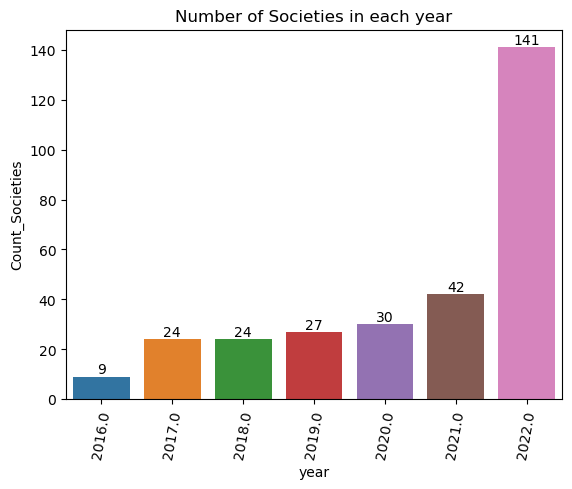

In [21]:
query = """SELECT year, COUNT(Name_of_Society)  FROM societies GROUP BY year ORDER BY year"""
curr.execute(query)
data = curr.fetchall()
df = pd.DataFrame(data, columns=["year","Count_Societies"])



df=df.sort_values(by="Count_Societies", ascending=False)
ax=sns.barplot(x=df["year"],y=df["Count_Societies"],data=df)
plt.xticks(rotation=80)
ax.bar_label(ax.containers[0])
plt.title("Number of Societies in each year")


plt.show()

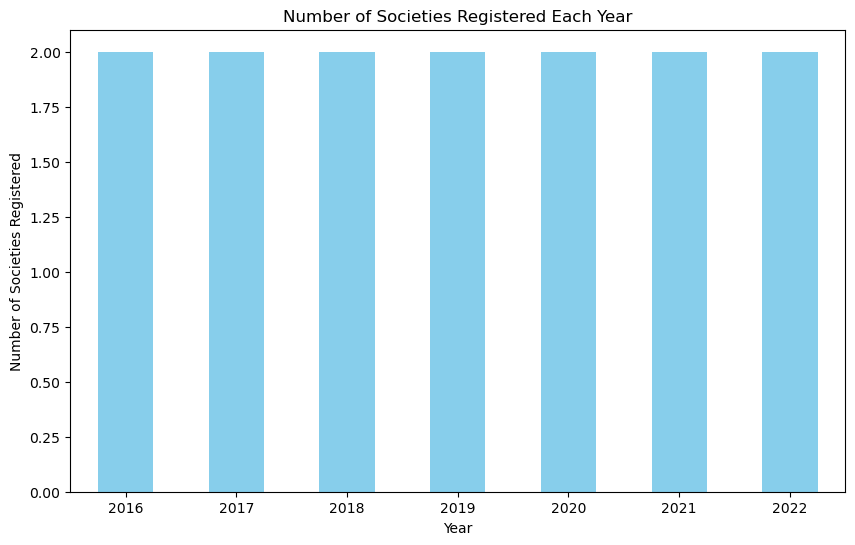

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data representing the societies dataset
data = {
    'year': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Name_of_Society': ['Society1', 'Society2', 'Society3', 'Society4', 'Society5', 'Society6', 'Society7',
                        'Society8', 'Society9', 'Society10', 'Society11', 'Society12', 'Society13', 'Society14']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Group by 'year' and count the number of societies for each year
yearly_counts = df.groupby('year').size()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Societies Registered')
plt.title('Number of Societies Registered Each Year')
plt.xticks(rotation=0)  # Keep the x-ticks horizontal
plt.show()
